### 오늘의 목표: 승객의 정보를 넣으면 생존여부를 예측해주는 모델을 만들어보자

- **작업환경설정**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pylab import rcParams
rcParams['font.family'] = 'AppleGothic' #malgunGothic
rcParams['figure.figsize'] = 17,8

import warnings
warnings.filterwarnings('ignore')

In [15]:
train = pd.read_csv('train.csv', index_col='PassengerId')
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### 탐색적분석 (EDA)

<Axes: xlabel='Age', ylabel='count'>

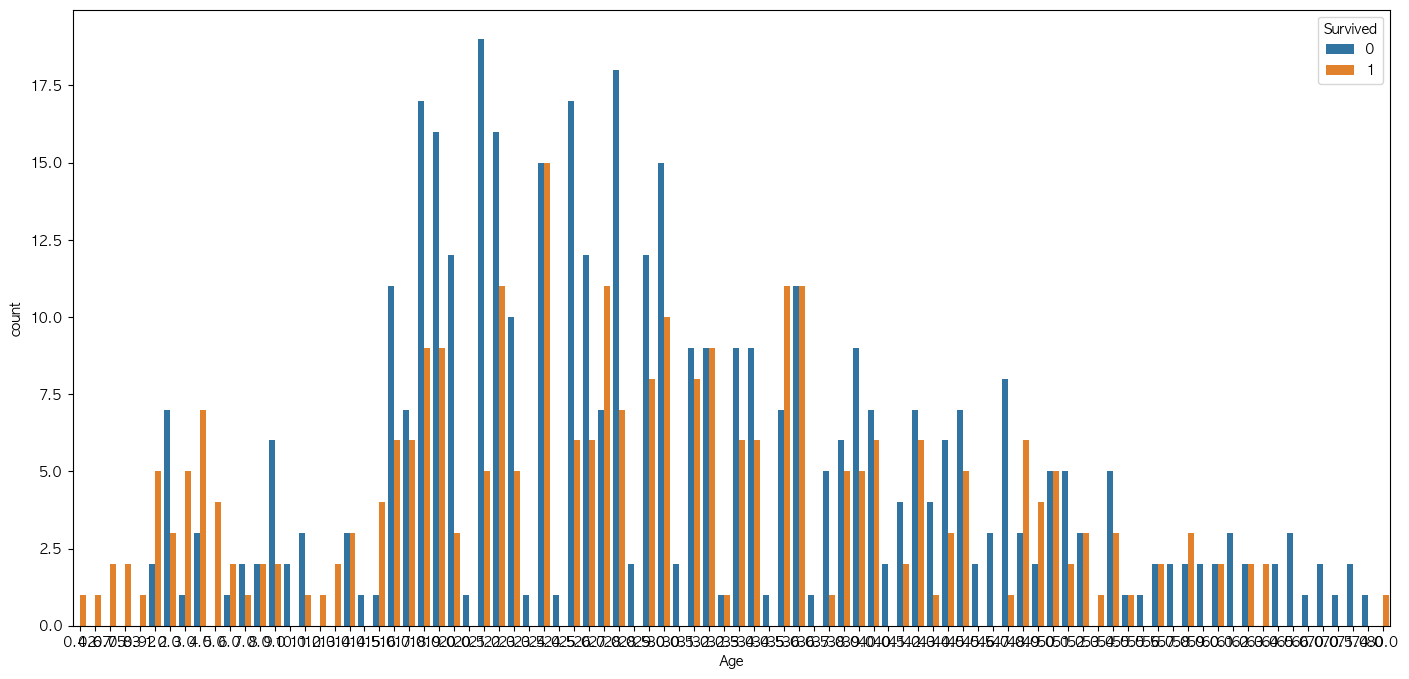

In [44]:
sns.countplot(data=train, x="Age", hue='Survived')

In [28]:
train[train.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [32]:
train.shape

(891, 11)

In [34]:
train.Embarked.value_counts()/ train.shape[0]

Embarked
S    0.722783
C    0.188552
Q    0.086420
Name: count, dtype: float64

In [36]:
train.loc[train.Embarked.isnull(), 'Embarked'] = 'S'

In [38]:
train.Embarked = train.Embarked.fillna('S')

In [40]:
train[train.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


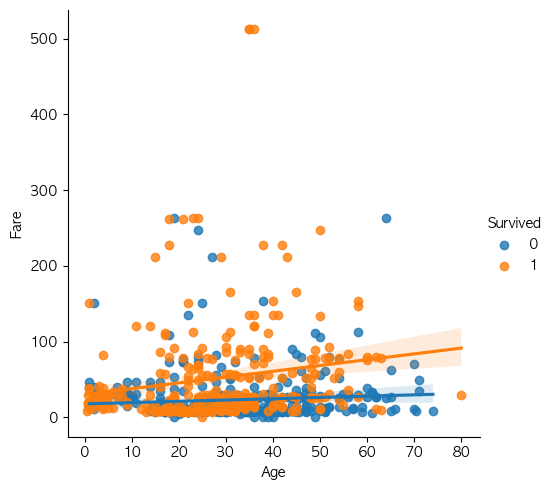

In [51]:
sns.lmplot(data=train, x='Age', y='Fare', hue='Survived')

<Axes: xlabel='Fare', ylabel='Density'>

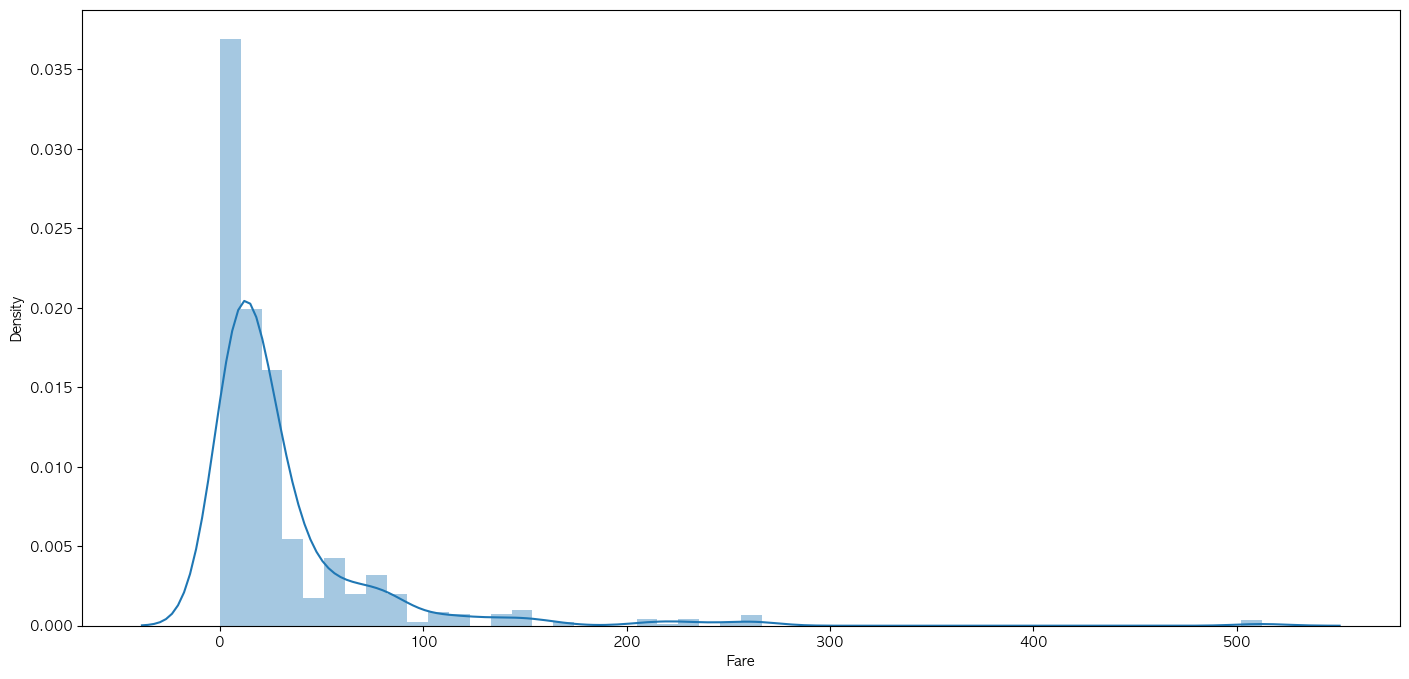

In [56]:
sns.distplot(train.Fare)

In [58]:
train[train.Fare >= 500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [60]:
train.loc[train.Fare > 500, 'Fare'] = 512/3

In [62]:
train[train.Fare >= 500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


<Axes: xlabel='Fare', ylabel='Density'>

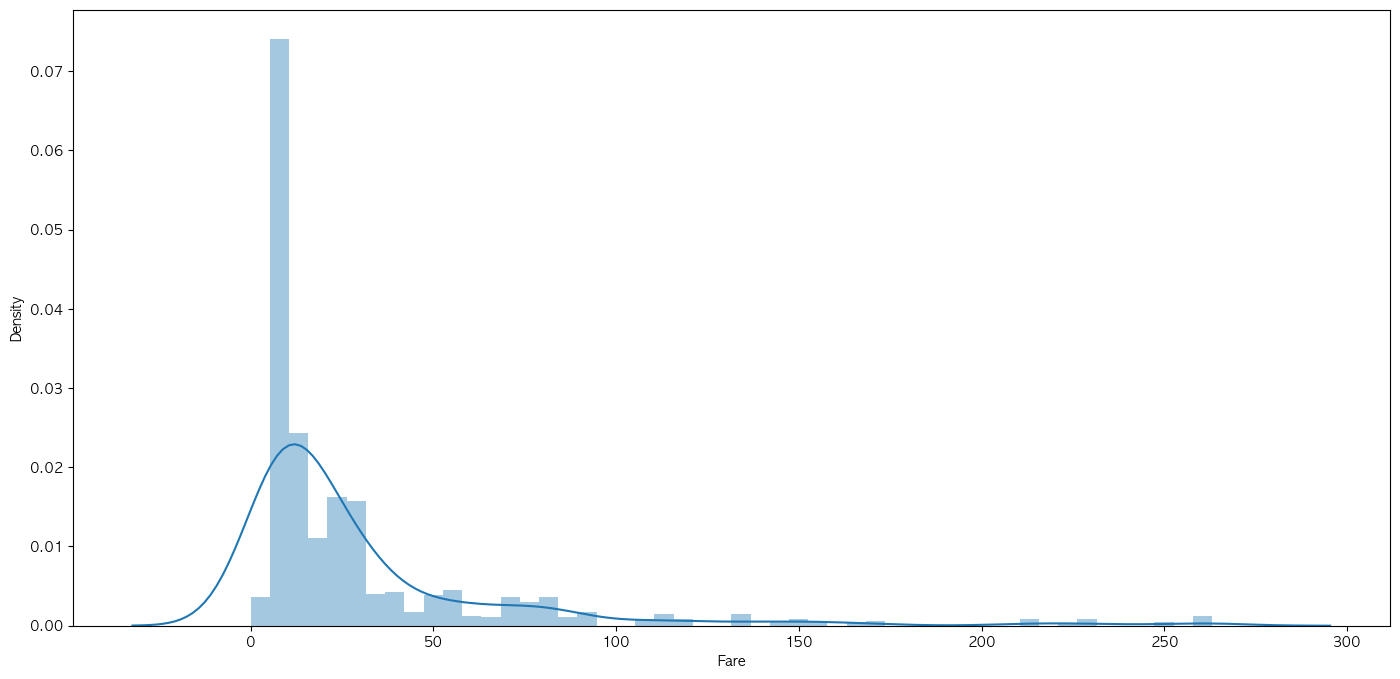

In [64]:
sns.distplot(train.Fare)

In [66]:
perish = train[train.Survived == 0]
survivor = train[train.Survived == 1]

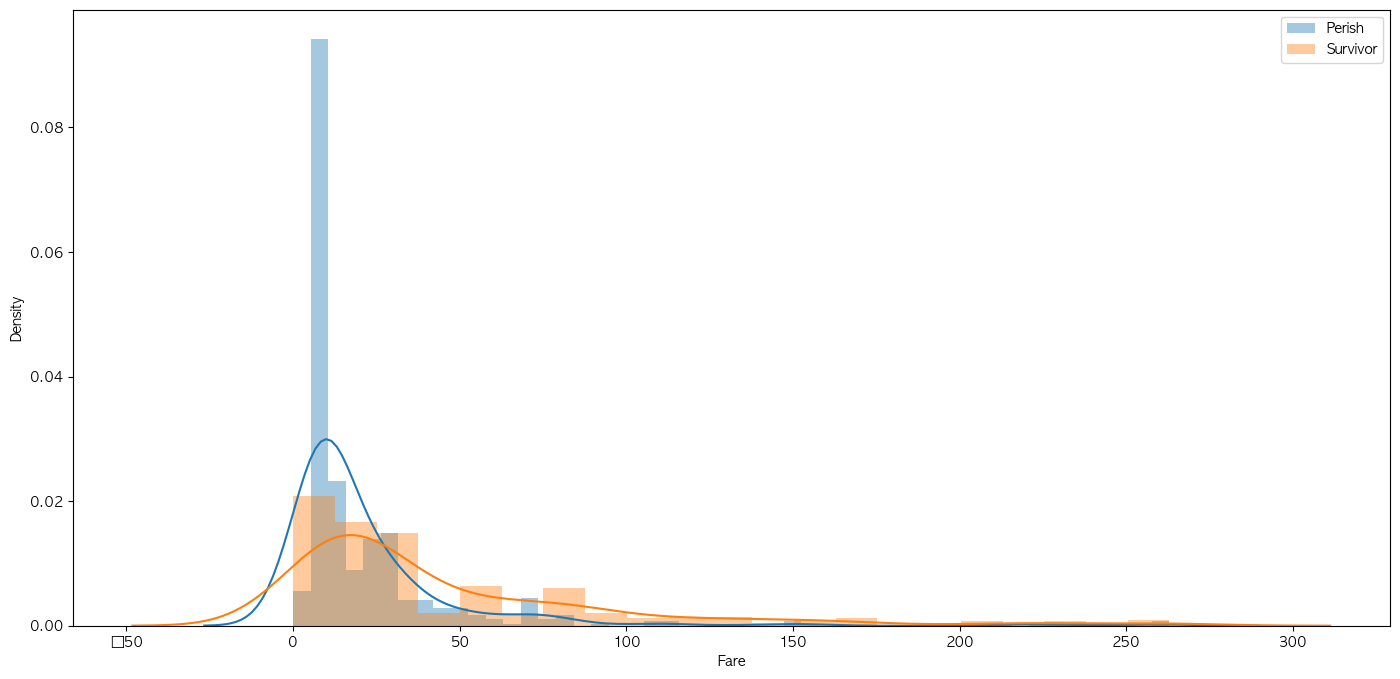

In [72]:
sns.distplot(perish.Fare, label='Perish')
sns.distplot(survivor.Fare, label = 'Survivor')
plt.legend()

<Axes: xlabel='Parch', ylabel='count'>

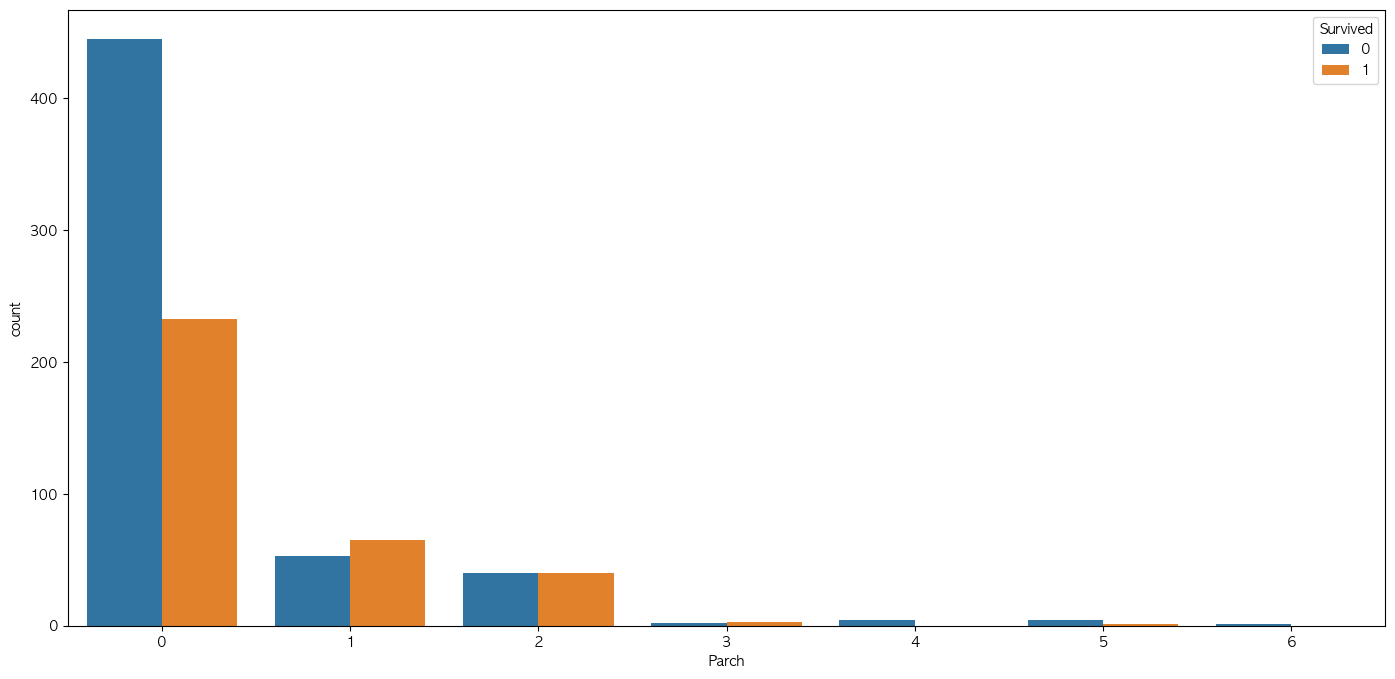

In [78]:
sns.countplot(data=train, x='Parch', hue='Survived')

In [80]:
train['Family_Size'] = train.SibSp + train.Parch
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [82]:
train.loc[train.Family_Size == 0, 'Alone'] = 1
train.loc[train.Family_Size != 0, 'Alone'] = 0

<Axes: xlabel='Family_Size', ylabel='count'>

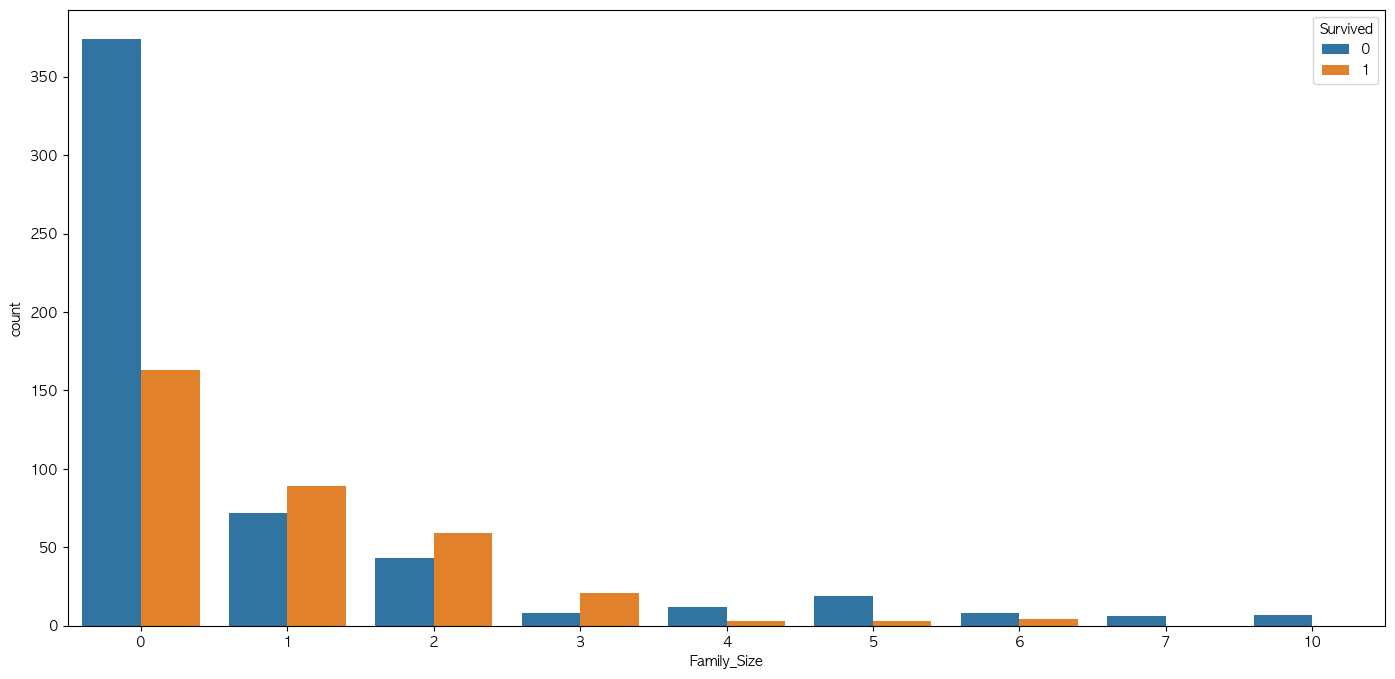

In [86]:
sns.countplot(data=train, x='Family_Size', hue='Survived')

In [88]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0


In [90]:
train.loc[train.Sex == 'male', 'Sex_encode'] = 1
train.loc[train.Sex == 'female', 'Sex_encode'] = 0

In [96]:
embarked = pd.get_dummies(train.Embarked, prefix='E')
train = pd.concat([train,embarked], axis=1)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone,Sex_encode,E_C,E_Q,E_S
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,1.0,False,False,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0,0.0,True,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0,0.0,False,False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0,0.0,False,False,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0,1.0,False,False,True


In [100]:
train.Name.sample(30)

PassengerId
121                          Hickman, Mr. Stanley George
661                        Frauenthal, Dr. Henry William
799                         Ibrahim Shawah, Mr. Yousseff
595                              Chapman, Mr. John Henry
613                          Murphy, Miss. Margaret Jane
530                          Hocking, Mr. Richard George
365                                  O'Brien, Mr. Thomas
551                          Thayer, Mr. John Borland Jr
218                         Jacobsohn, Mr. Sidney Samuel
77                                     Staneff, Mr. Ivan
568          Palsson, Mrs. Nils (Alma Cornelia Berglund)
240                               Hunt, Mr. George Henry
671    Brown, Mrs. Thomas William Solomon (Elizabeth ...
384    Holverson, Mrs. Alexander Oskar (Mary Aline To...
666                                   Hickman, Mr. Lewis
591                                 Rintamaki, Mr. Matti
292              Bishop, Mrs. Dickinson H (Helen Walton)
110                

#### 호칭을 잘라내는 함수를 정의해보자

In [104]:
def find_title(name):
    return name.split(', ')[1].split('.')[0]

In [106]:
train['Title'] = train.Name.apply(find_title)

<Axes: xlabel='Title', ylabel='count'>

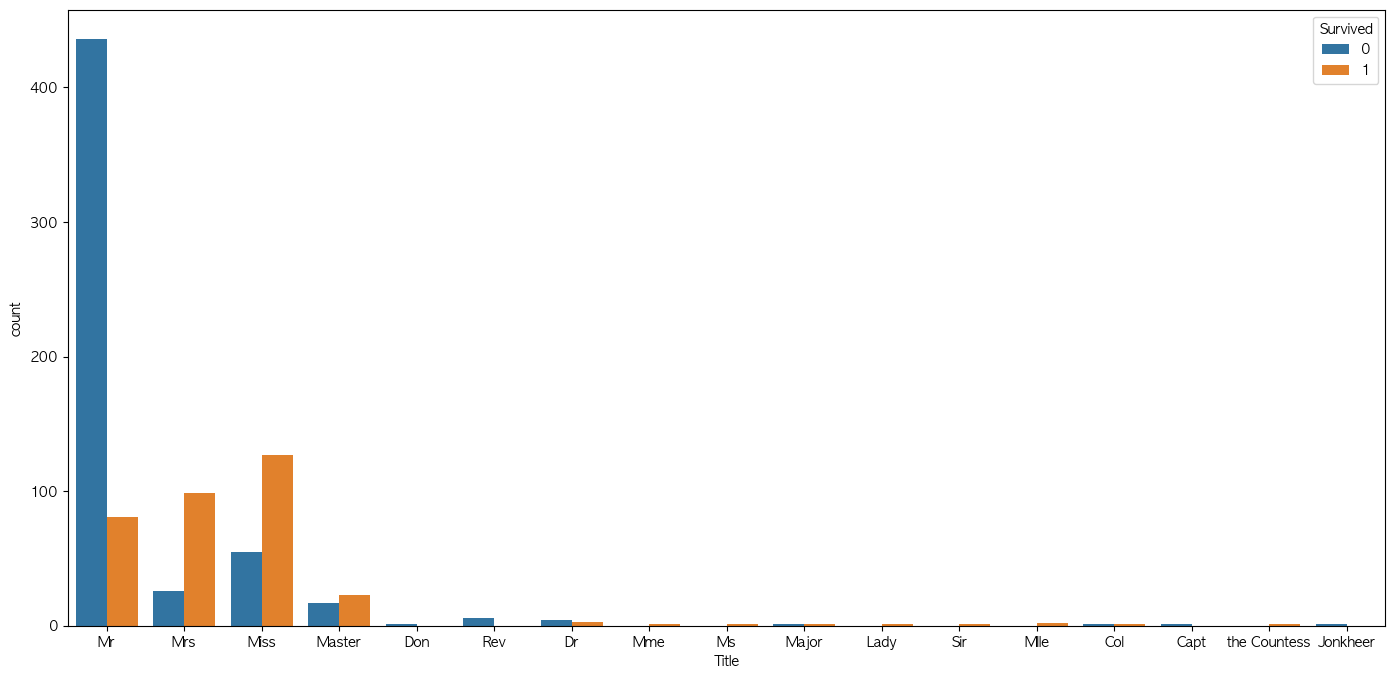

In [110]:
sns.countplot(data=train, x='Title', hue='Survived')

In [114]:
title = pd.get_dummies(train.Title)
train = pd.concat([train,title.Master], axis=1)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone,Sex_encode,E_C,E_Q,E_S,Title,Master
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,1.0,False,False,True,Mr,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0,0.0,True,False,False,Mrs,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0,0.0,False,False,True,Miss,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0,0.0,False,False,True,Mrs,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0,1.0,False,False,True,Mr,False


In [118]:
train.Age.isnull().sum() / train.shape[0]

0.19865319865319866

In [120]:
train.Age.mean()

29.69911764705882

In [122]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone,Sex_encode,E_C,E_Q,E_S,Title,Master
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,1.0,False,False,True,Mr,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0,0.0,True,False,False,Mrs,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0,0.0,False,False,True,Miss,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0,0.0,False,False,True,Mrs,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0,1.0,False,False,True,Mr,False


In [124]:
train[train.Pclass ==1].Age.mean()

38.233440860215055

In [126]:
train[train.Pclass ==2].Age.mean()

29.87763005780347

In [128]:
train[train.Pclass ==3].Age.mean()

25.14061971830986

In [130]:
train[train.Sex == 'male'].Age.mean()

30.72664459161148

In [132]:
train[train.Sex == 'female'].Age.mean()

27.915708812260537

>> **Q. 승객의 선실등급과 성별을 둘다 고려해서 분류하고 각각의 중앙값(median)을 찾아주세요 (1등석 남자의 중앙값등등)**

In [147]:
m1 = train[(train.Sex == 'male')&(train.Pclass==1)].Age.median()

In [149]:
m2 = train[(train.Sex == 'male')&(train.Pclass==2)].Age.median()

In [151]:
m3 = train[(train.Sex == 'male')&(train.Pclass==3)].Age.median()

In [153]:
f1 = train[(train.Sex == 'female')&(train.Pclass==1)].Age.median()

In [155]:
f2 = train[(train.Sex == 'female')&(train.Pclass==2)].Age.median()

In [157]:
f3 = train[(train.Sex == 'female')&(train.Pclass==3)].Age.median()

In [159]:
train.loc[(train.Sex=='male')&(train.Pclass==1)&(train.Age.isnull()),'Age'] =m1
train.loc[(train.Sex=='male')&(train.Pclass==2)&(train.Age.isnull()),'Age'] =m2
train.loc[(train.Sex=='male')&(train.Pclass==3)&(train.Age.isnull()),'Age'] =m3
train.loc[(train.Sex=='female')&(train.Pclass==1)&(train.Age.isnull()),'Age']=f1
train.loc[(train.Sex=='female')&(train.Pclass==2)&(train.Age.isnull()),'Age']=f2
train.loc[(train.Sex=='female')&(train.Pclass==3)&(train.Age.isnull()),'Age']=f3

In [161]:
train.Age.isnull().sum()

0

In [167]:
train.Cabin.isnull().sum() / train.shape[0]

0.7710437710437711

In [169]:
train.loc[train.Cabin.isnull(), 'Cabin_encode'] = 0
train.loc[train.Cabin.notnull(), 'Cabin_encode'] = 1

<Axes: xlabel='Cabin_encode', ylabel='count'>

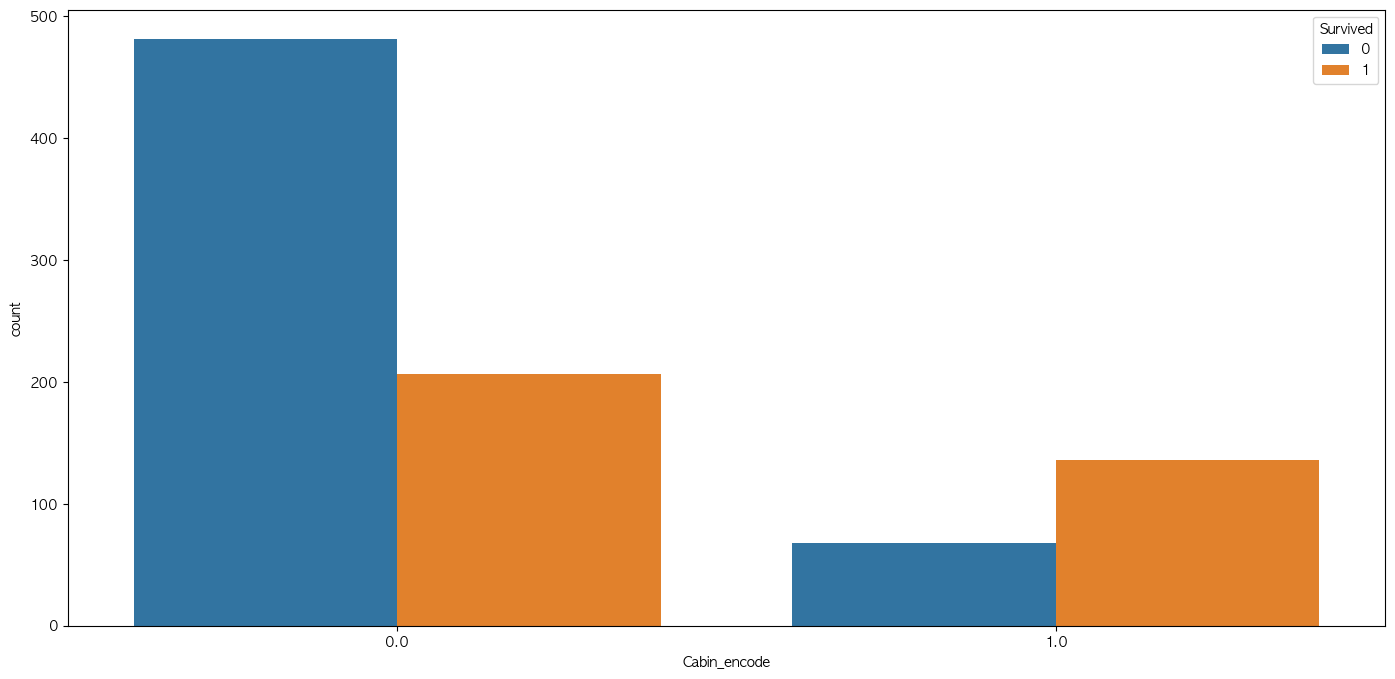

In [175]:
sns.countplot(data=train, x='Cabin_encode', hue='Survived')

In [181]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Alone', 'Sex_encode',
       'E_C', 'E_Q', 'E_S', 'Title', 'Master', 'Cabin_encode'],
      dtype='object')

In [201]:
train = train[['Survived', 'Pclass',  'Age', 'SibSp', 'Parch', 
       'Fare', 'Family_Size', 'Alone', 'Sex_encode',
       'E_C', 'E_Q', 'E_S', 'Master', 'Cabin_encode']]

<Axes: >

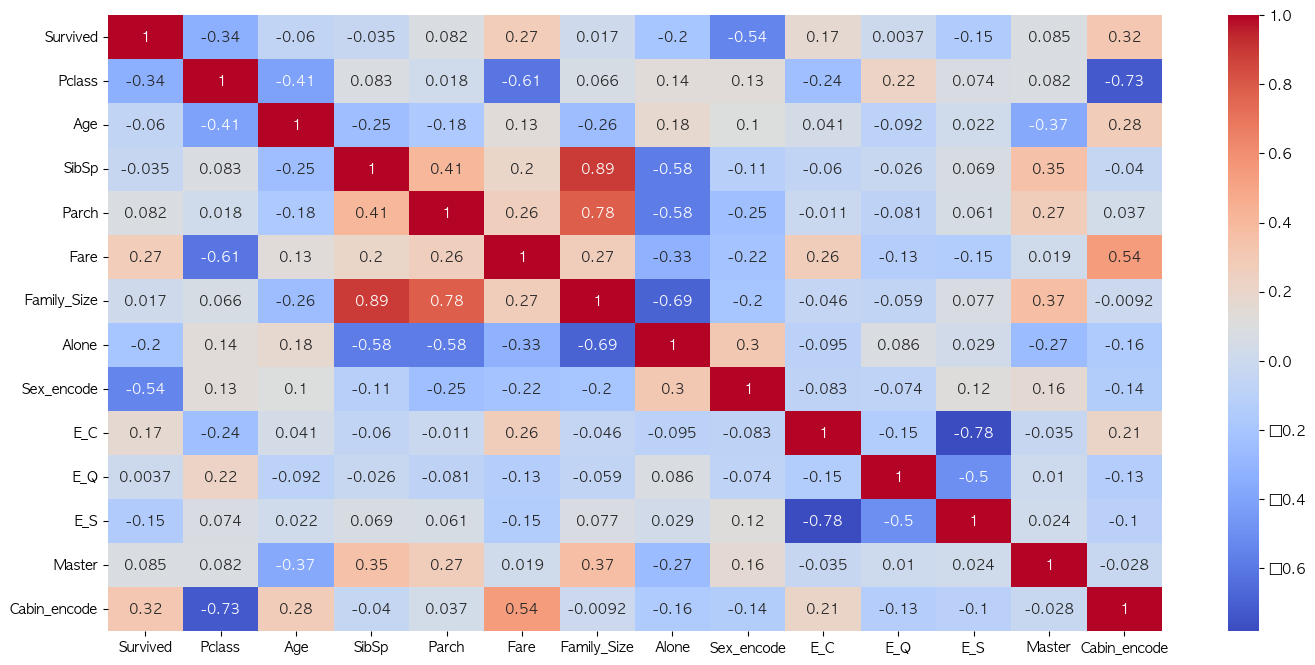

In [195]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [205]:
train = train[['Survived', 'Pclass',  'Age', 'SibSp', 'Parch', 
       'Fare', 'Family_Size', 'Alone', 'Sex_encode',
       'E_C', 'E_Q', 'E_S', 'Master', 'Cabin_encode']]

In [207]:
train.corrwith(train.Survived).sort_values()

Sex_encode     -0.543351
Pclass         -0.338481
Alone          -0.203367
E_S            -0.149683
Age            -0.059579
SibSp          -0.035322
E_Q             0.003650
Family_Size     0.016639
Parch           0.081629
Master          0.085221
E_C             0.168240
Fare            0.270353
Cabin_encode    0.316912
Survived        1.000000
dtype: float64

In [209]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   Family_Size   891 non-null    int64  
 7   Alone         891 non-null    float64
 8   Sex_encode    891 non-null    float64
 9   E_C           891 non-null    bool   
 10  E_Q           891 non-null    bool   
 11  E_S           891 non-null    bool   
 12  Master        891 non-null    bool   
 13  Cabin_encode  891 non-null    float64
dtypes: bool(4), float64(5), int64(5)
memory usage: 80.1 KB
